In [1]:
from qat.qlmaas import QLMaaSConnection
conn = QLMaaSConnection(hostname="qlm35e.neasqc.eu", check_host=False)

In [2]:
import parameters
from SQA_hyper_tuning_BO import BayesianOptimizer, SQA_solver, Brute_Force_Solver
import numpy as np
import matplotlib.pyplot as plt

In [3]:
n_spins, n_shots, delta_t = parameters.n_spins, parameters.n_shots, parameters.delta_t
n_init, n_iters = parameters.n_init, parameters.n_iters
#min_vals, max_vals = parameters.min_vals, parameters.max_vals
#bounds = [(min_vals[i], max_vals[i]) for i in range(len(min_vals))]
bounds = [(-5.12, 5.12), (-5.12, 5.12)]

In [16]:
'''
sqa = SQA_solver(n_spins=n_spins, n_shots=n_shots, delta_t=delta_t)

mode = 'random' # 'graph' or 'random'
if mode == 'random':
    seed = 42
    J, h = sqa.generate_random_problems(n_examples=1, seed=seed)
elif mode =='graph':
    file_name = "40nodes_p0.3_J-1.0to1.0_h0_Erdös-Rényi.pkl"
    G = sqa.load_graph_from_file(filepath=f"./{file_name}")
    J, h = sqa.ising_params_from_graph(G) 
    '''


class Sphere:
    def __init__(self, dim=2):
        self.dim = dim

    def solve(self, x):
        return np.sum(x**2)

sqa = Sphere(dim=2)
n_init = 60
n_iters = 240

In [17]:
bo = BayesianOptimizer(sqa=sqa, bounds=bounds, n_init=n_init)
X_opt, Y_opt, history = bo.optimize(n_iters=n_iters)

Iter 1: x = [0.19241597 2.07891414], f(x) = 4.3589
Iter 2: x = [-0.00383395  0.02298467], f(x) = 0.0005
Iter 3: x = [1.36734424 0.36633276], f(x) = 2.0038
Iter 4: x = [ 0.30362192 -2.64343254], f(x) = 7.0799
Iter 5: x = [0.499034   1.96500682], f(x) = 4.1103
Iter 6: x = [-0.02908383  0.05882863], f(x) = 0.0043
Iter 7: x = [-2.10484335 -1.17659926], f(x) = 5.8148
Iter 8: x = [-0.01939795  0.04501197], f(x) = 0.0024
Iter 9: x = [-0.01407753  0.03724275], f(x) = 0.0016
Iter 10: x = [0.41610365 1.40728219], f(x) = 2.1536
Iter 11: x = [0.5565855  1.14402044], f(x) = 1.6186
Iter 12: x = [-0.01708824  0.00623383], f(x) = 0.0003
Iter 13: x = [-0.01369552  0.00560326], f(x) = 0.0002
Iter 14: x = [ 5.02277265 -0.89479499], f(x) = 26.0289
Iter 15: x = [ 1.35001305 -0.52791785], f(x) = 2.1012
Iter 16: x = [2.98576941 2.96568978], f(x) = 17.7101
Iter 17: x = [-1.28746705 -1.32462441], f(x) = 3.4122
Iter 18: x = [0.28365936 5.04795951], f(x) = 25.5624
Iter 19: x = [-0.45407485  1.2301578 ], f(x) = 1

In [18]:
# Show best result
best_idx = np.argmin(Y_opt)
print("\nBest hyperparameters found:")
print(f"x: {X_opt[best_idx][0]:.4f}")
print(f"SQA ground state energy: {Y_opt[best_idx][0]:.4f}")



Best hyperparameters found:
x: -0.0009
SQA ground state energy: 0.0000


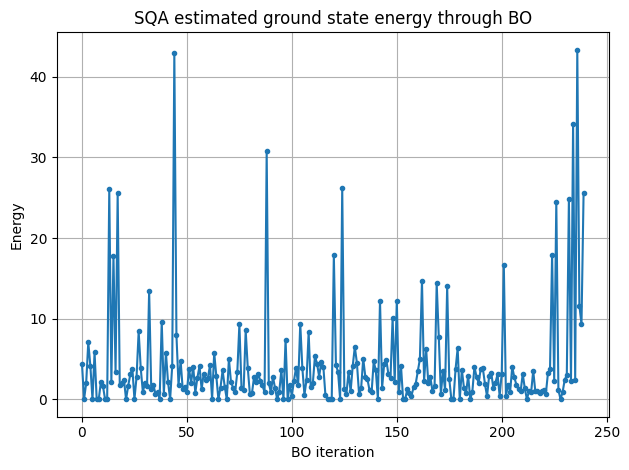

In [19]:
energies = np.array([t[1] for t in history])
x = np.array([t[0] for t in history])

plt.figure()
plt.plot(range(n_iters), energies,'.-')
plt.xlabel('BO iteration')
plt.ylabel('Energy')
plt.title('SQA estimated ground state energy through BO')
plt.grid(True)
plt.tight_layout()
plt.show()